In [31]:
# prompt: import file from google drive

import io
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip drive/MyDrive/archive.zip

Archive:  drive/MyDrive/archive.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inflating: Data/genres_original/blues/blues.00013.wav  
  inflating: Data/genres_original/blues/blues.00014.wav  
  inflating: Da

In [ ]:
# Load the CSV files
features_mean = pd.read_csv('Data/features_30_sec.csv')
features_split = pd.read_csv('Data/features_3_sec.csv')
features_mean

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


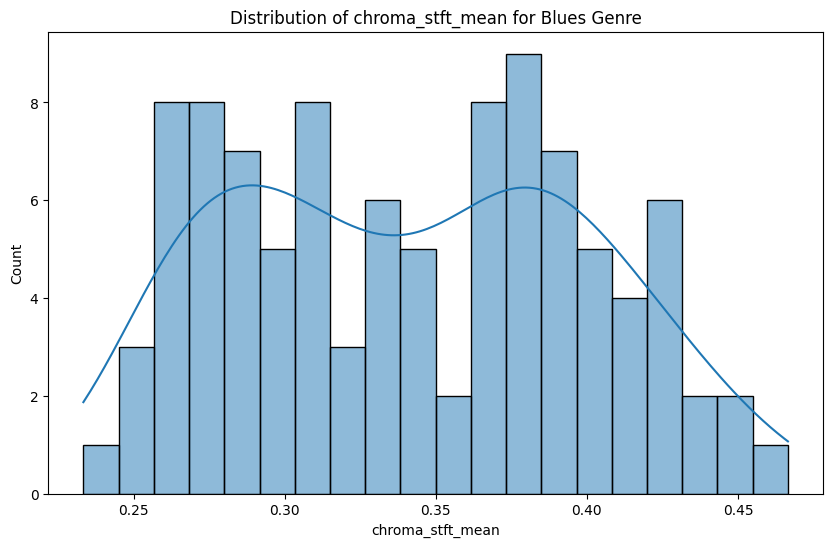

In [ ]:
import seaborn as sns

# Filter the data for a specific genre (e.g., 'blues')
blues_data = features_mean[features_mean['label'] == 'blues']

# Plot the distribution of 'chroma_stft_mean' for the 'blues' genre
plt.figure(figsize=(10, 6))
sns.histplot(blues_data['chroma_stft_mean'], bins=20, kde=True)
plt.title('Distribution of chroma_stft_mean for Blues Genre')
plt.xlabel('chroma_stft_mean')
plt.ylabel('Count')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV files
features_mean = pd.read_csv('Data/features_30_sec.csv')
features_split = pd.read_csv('Data/features_3_sec.csv')

# Initialize the label encoder and fit it to the labels
label_encoder = LabelEncoder()
label_encoder.fit(features_mean['label'])  # Fit to the 'features_mean' labels

def preprocess_data(df, scaler):
    # Extract features and labels
    X = df.drop(['label', 'filename'], axis=1)  # Features
    y = label_encoder.transform(df['label'])  # Encoded labels

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

# Preprocess 'features_mean' dataset
X_mean_train, X_mean_test, y_mean_train, y_mean_test = preprocess_data(features_mean, StandardScaler())

# Preprocess 'features_split' dataset using the same scaler
X_split_train, X_split_test, y_split_train, y_split_test = preprocess_data(features_split, StandardScaler())

import numpy as np

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

# Function to train the model with a training message
def train_model_with_message(model, X_train, y_train):
    print("Training the model...")
    model.fit(X_train, y_train)
    print("Training complete.")

# Initialize and train the KNN classifier for 'features_mean' dataset
knn_mean_classifier = KNNClassifier(k=4)  # You can adjust the value of k
train_model_with_message(knn_mean_classifier, X_mean_train, y_mean_train)

# Evaluate the model
accuracy_mean, report_mean, confusion_mean = evaluate_model(knn_mean_classifier, X_mean_test, y_mean_test)

# Initialize and train the KNN classifier for 'features_split' dataset
knn_split_classifier = KNNClassifier(k=4)  # You can adjust the value of k
train_model_with_message(knn_split_classifier, X_split_train, y_split_train)

# Evaluate the model
accuracy_split, report_split, confusion_split = evaluate_model(knn_split_classifier, X_split_test, y_split_test)

# Print evaluation results for 'features_mean' dataset
print("Accuracy (Mean Features):", accuracy_mean)
print("Classification Report (Mean Features):\n", report_mean)
print("Confusion Matrix (Mean Features):\n", confusion_mean)

# Print evaluation results for 'features_split' dataset
print("Accuracy (Split Features):", accuracy_split)
print("Classification Report (Split Features):\n", report_split)
print("Confusion Matrix (Split Features):\n", confusion_split)


Training the model...
Training complete.
Training the model...
Training complete.
Accuracy (Mean Features): 0.66
Classification Report (Mean Features):
               precision    recall  f1-score   support

           0       0.58      0.55      0.56        20
           1       0.71      0.92      0.80        13
           2       0.65      0.74      0.69        27
           3       0.48      0.62      0.54        21
           4       0.65      0.73      0.69        15
           5       0.83      0.68      0.75        22
           6       0.91      0.84      0.87        25
           7       0.64      0.69      0.67        13
           8       0.71      0.43      0.54        23
           9       0.50      0.48      0.49        21

    accuracy                           0.66       200
   macro avg       0.67      0.67      0.66       200
weighted avg       0.67      0.66      0.66       200

Confusion Matrix (Mean Features):
 [[11  0  2  0  0  0  1  0  1  5]
 [ 0 12  0  0  0  1 

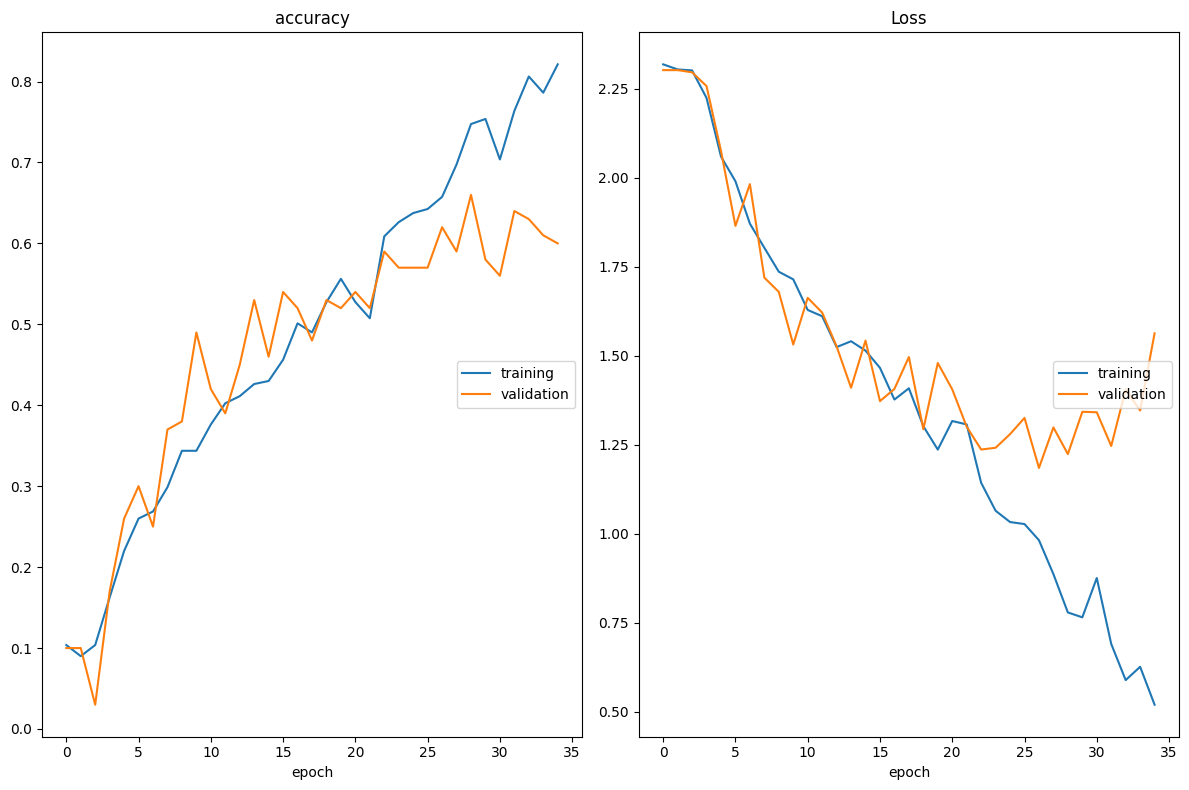

accuracy
	training         	 (min:    0.090, max:    0.821, cur:    0.821)
	validation       	 (min:    0.030, max:    0.660, cur:    0.600)
Loss
	training         	 (min:    0.520, max:    2.319, cur:    0.520)
	validation       	 (min:    1.185, max:    2.303, cur:    1.563)
25/25 [==============================] - 5s 199ms/step - loss: 0.5201 - accuracy: 0.8213 - val_loss: 1.5633 - val_accuracy: 0.6000


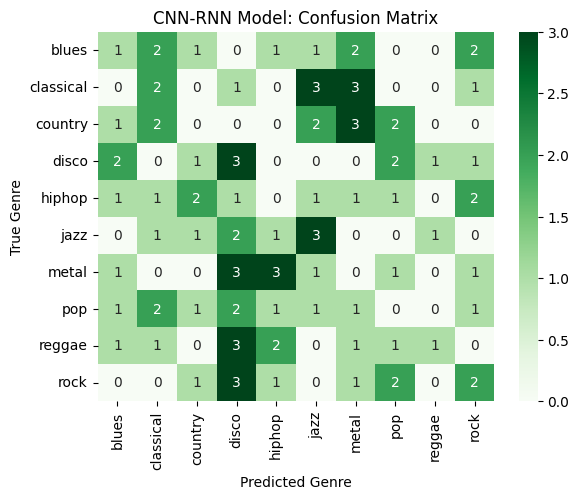

CNN-RNN Model
Training Accuracy: 86.625% 
Train Loss: 0.398

Validation Accuracy: 60.0% 
Test Loss: 1.5633

Testing Accuracy: 54.5455% 
Test Loss: 1.6852


In [27]:
import random, os, glob
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, Conv2D, MaxPool2D, Flatten, LSTM, Reshape, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

# Set the random seed for reproducibility
def setRandom():
    seed = 0
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.compat.v1.set_random_seed(seed)


setRandom()

# Data source and genres
source = "Data/images_original"
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]

# Splitting data into train, validation, and test sets
split = [80, 10, 10]
train, val, test = {}, {}, {}
dictionaries = [train, val, test]

for d in dictionaries:
    if d == train: num = slice(0, split[0])
    elif d == val: num = slice(split[0], split[0] + split[1])
    else: num = slice(split[0] + split[1], split[0] + split[1] + split[2])
    for genre in genres:
        path = os.path.join(source, genre)
        pngs = glob.glob(os.path.join(path, "*.png"))
        selected = pngs[num]
        d[genre] = selected

# Function to create dataset
def createDataset(d):
    imgSize = (288, 432)
    imageList, labelList = [], []
    for genre, paths in d.items():
        for path in paths:
            image = tf.image.decode_png(tf.io.read_file(path), channels=3)
            image = tf.image.resize(image, imgSize)
            image /= 255.0
            imageList.append(image)
            labelList.append(genres.index(genre))

    # Check if the image list is empty
    if not imageList:
        raise ValueError("No images found. Check the file paths and dataset.")

    dataset = tf.data.Dataset.from_tensor_slices((imageList, labelList))
    dataset = dataset.shuffle(buffer_size=len(imageList)).batch(32)
    return dataset

# Preparing datasets
training = createDataset(train)
validation = createDataset(val)
testing = createDataset(test)


# Creating the model
model = Sequential([
    # CNN Layers
    BatchNormalization(input_shape=(288, 432, 3)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),
    Conv2D(512, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    # Reshape for RNN
    Reshape((-1, 512)),  # Reshape to (time_steps, features)

    # RNN Layer
    LSTM(128, return_sequences=True),
    LSTM(128),

    # Dense layers for classification
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(len(genres), activation="softmax")
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Set the random seed for training
setRandom()

# Early stopping callback
earlyStopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Model training
model.fit(training, validation_data=validation, batch_size=32, epochs=35, verbose=1, callbacks=[earlyStopping, PlotLossesKeras()])

def confusionMatrix(model, name):
    trueLabels = np.concatenate([y for x, y in testing], axis = 0) # get the true labels from the testing dataset

    predictedLabels = np.argmax(model.predict(testing, verbose = 0), axis = 1) # get the predicted labels from the model

    matrix = confusion_matrix(trueLabels, predictedLabels) # create the confusion matrix

    plt.figure() # plot the confusion matrix using seaborn for the heatmap
    sns.heatmap(matrix, annot = True, cmap = "Greens", xticklabels = genres, yticklabels = genres)
    plt.xlabel("Predicted Genre")
    plt.ylabel("True Genre")
    plt.title(f"{name} Model: Confusion Matrix")
    plt.show()

    trainStats, valStats, testStats = model.evaluate(training, verbose = 0), model.evaluate(validation, verbose = 0), model.evaluate(testing, verbose = 0)
    print(f"\033[1m{name} Model\033[0m")
    print(f"Training Accuracy: {round(trainStats[1] * 100, 4)}% \nTrain Loss: {round(trainStats[0], 4)}\n")
    print(f"Validation Accuracy: {round(valStats[1] * 100, 4)}% \nTest Loss: {round(valStats[0], 4)}\n")
    print(f"Testing Accuracy: {round(testStats[1] * 100, 4)}% \nTest Loss: {round(testStats[0], 4)}")


# Evaluate the model
confusionMatrix(model, "CNN-RNN")


1/1 [==============================] - 0s 23ms/step
Predicted genre: blues


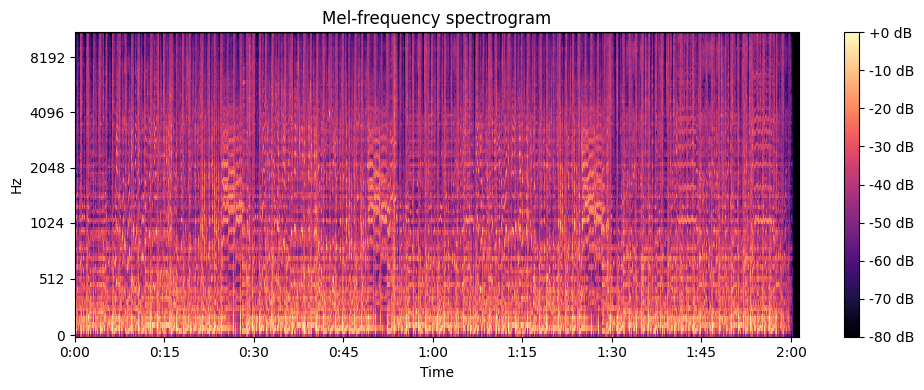

In [30]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Load the audio file
audio_path = 'Stayin_Alive.mp3'
y, sr = librosa.load(audio_path)

# Generate a Mel-scaled spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
S_DB = librosa.power_to_db(S, ref=np.max)

# Plot and save the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.savefig('Stayin_alive_spectrogram.png')

# Load, Resize, and Normalize the Spectrogram Image
image_path = 'Stayin_alive_spectrogram.png'
image = tf.image.decode_png(tf.io.read_file(image_path), channels=3)
image = tf.image.resize(image, (288, 432))  # assuming (288, 432) is the correct input shape for your model
image = tf.cast(image, tf.float32) / 255.0
image = np.expand_dims(image, axis=0)

# Predict using your CNN model
predictions = model.predict(image)
predicted_genre_index = np.argmax(predictions)
predicted_genre = genres[predicted_genre_index]

print(f"Predicted genre: {predicted_genre}")
